In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
recent_date


'2017-08-23'

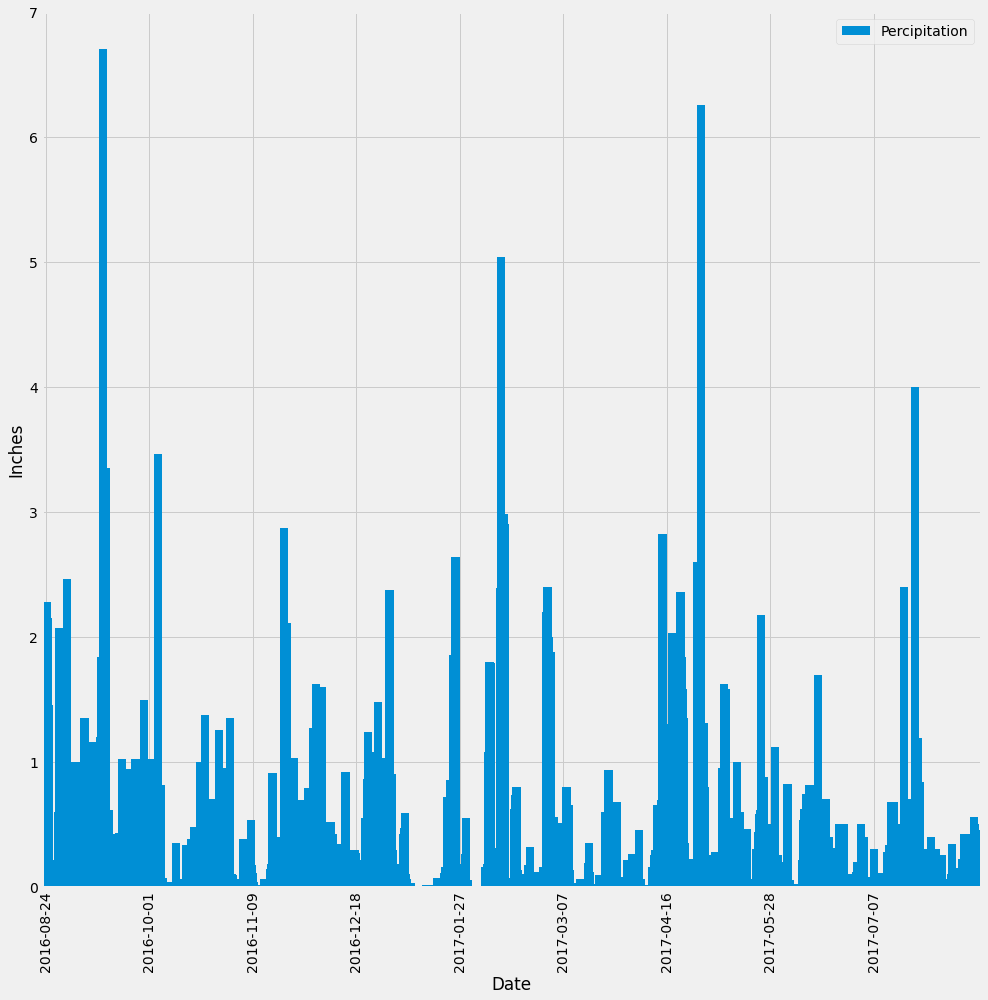

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_dt = dt.datetime.strptime(recent_date, "%Y-%m-%d")
# Calculate the date one year from the last date in data set.
one_year_earlier = recent_date_dt - dt.timedelta(days=365)
one_year_earlier_dt = dt.datetime.strftime(one_year_earlier,"%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
prcp_scores_query = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date > one_year_earlier_dt).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(prcp_scores_query, columns=['Date', 'Percipitation'])
data.set_index('Date', inplace=True)

# Sort the dataframe by date
data = pd.DataFrame.sort_index(data)


# Use Pandas Plotting with Matplotlib to plot the data
data.plot.bar(figsize=(15,15), width=20)
plt.ylabel('Inches')
plt.locator_params(axis='x', nbins=9)
plt.ylim(0,max(data['Percipitation'])+.3)
plt.show();



In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = session.query(station).\
    group_by(station.station).count()
total_number_stations

9

In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station_counts = session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()
active_station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations = session.query(func.min(measurement.tobs),\
     func.max(measurement.tobs),\
     func.avg(measurement.tobs)).\
    filter(measurement.station =='USC00519281').all()

(lowest_temp, highest_temp, avg_temp) = most_active_stations[0] 
print(f"The most active station's lowest temperature is {lowest_temp}, \
the highest temperature is {highest_temp}, and \
the average temperature is {avg_temp}.")

The most active station's lowest temperature is 54.0, the highest temperature is 85.0, and the average temperature is 71.66378066378067.


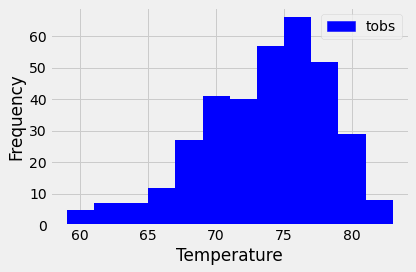

In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_last_12 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station =='USC00519281').\
    filter(measurement.date > one_yr_earlier_dt).all()

temp_list = []
for temp in most_active_last_12:
    temp_list.append(temp[1])
import matplotlib.patches as mpatches
plt.hist(temp_list, color='blue', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
blue_patch = mpatches.Patch(color='blue', label='tobs')
plt.legend(handles=[blue_patch])
plt.tight_layout()
plt.show()


# Close session

In [ ]:
# Close Session
session.close()